In [50]:

# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Import psycopg2
pip install psycopg2

In [53]:
# Create connection
username = 'postgres'
password = "*******"
host = 'localhost'
port = '5432'
database = 'Employee_schema_db'



from sqlalchemy import create_engine
engine_pgsql = create_engine(f'postgresql://{username}:{password}@{host}:{port}/{database}')
conn = engine_pgsql.connect()

In [54]:
# Create employee_df to read the employee data using panda
employee_df = pd.read_sql("select * from employees", conn)
employee_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991


In [55]:
# Create salaries_df to read the salaries data using panda
salaries_df = pd.read_sql("select * from salaries", conn)
salaries_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [56]:
# Create title_df to read the title data using panda and renaming the column name
titles_df = pd.read_sql("select * from titles", conn)
titles_df = titles_df.rename(columns={"title_id":"emp_title_id"})
titles_df.head()

,emp_title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [57]:
# Combine employee and salaries data frame on emp_no

combined_1_df=pd.merge(employee_df,salaries_df,on = "emp_no")
combined_1_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991,53422
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992,48973
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991,40000


In [58]:
# Combine the combined_1_df and title data frame on emp_title_id
combined_2_df=pd.merge(combined_1_df,titles_df,on = "emp_title_id")
combined_2_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000,Staff
1,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000,Staff
2,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991,56087,Staff
3,246449,s0001,3/23/1958,Subbu,Bultermann,F,3/25/1988,87084,Staff
4,48085,s0001,1/19/1964,Venkatesan,Gilg,M,6/28/1993,63016,Staff


In [59]:
#Calculate the average salary by title 
avg_salary=combined_2_df.groupby(["title"])["salary"].mean()
#Average salary rounded to 2 decimals
avg_rounded_salary=avg_salary.round(2)
# sorting the data in descending order
avg_sorted_salary=avg_rounded_salary.sort_values(ascending=False)
avg_sorted_salary

title
Senior Staff          58550.17
Staff                 58465.38
Manager               51531.04
Technique Leader      48582.90
Assistant Engineer    48564.43
Engineer              48535.34
Senior Engineer       48506.80
Name: salary, dtype: float64

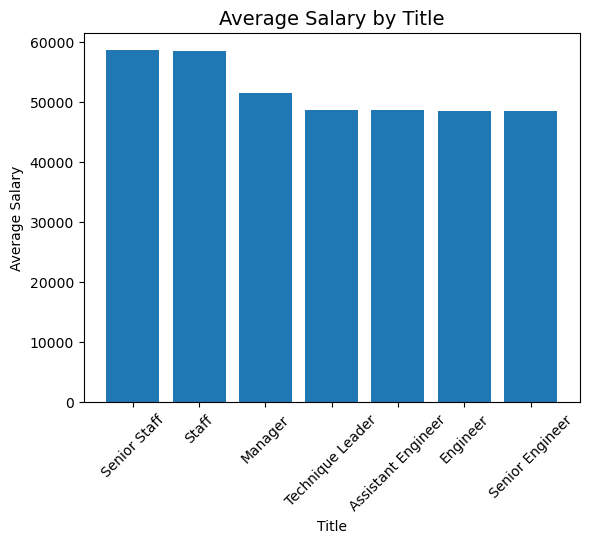

In [60]:
#Bar graph for the average salary based on title
plt.bar(avg_sorted_salary.index, avg_sorted_salary.values)
plt.xticks(rotation=45)
plt.title("Average Salary by Title", fontsize = 14)
plt.xlabel("Title")
plt.ylabel("Average Salary")
plt.show()